<a href="https://colab.research.google.com/github/Karthikeyan-ganesan86/CS/blob/master/02_b_API_connection_and_analysis_of_Trade_Canada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALYSIS IS DONE FOR FEW METRICS FOR TRADE DATA OF USA AND CANADA MARKETS WITH BENCHMARKS FOR THE CORRESPONDING MARKETS LIKE SP500(FOR USA) AND GSPTSE(FOR CANADA)

# BRINGING ALL THE NEEDED LIBRARIES FOR CONNECTING TO API AND DOING INITIAL ANALYSIS

In [ ]:
# Installing yfinance
!pip install yfinance

In [ ]:
# Installing Quantstats
!pip install quantstats --upgrade --no-cache-dir

In [ ]:
# installing PyPortfolioOpt
!pip install pyportfolioopt

In [ ]:
# Installing the TA (Technical Analysis) library
!pip install ta

In [ ]:
# Importing Libraries

# Data handling and statistical analysis
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

# Financial data
import quantstats as qs
import ta
import yfinance as yf

# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Enabling Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime and hiding warnings
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import matplotlib.font_manager
print(matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf'))

['/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/Li

In [ ]:
# Getting daily returns for 4 different US stocks in the same time window
aapl = qs.utils.download_returns('AAPL')
aapl = aapl.loc['2010-07-01':'2023-09-15']

tsla = qs.utils.download_returns('TSLA')
tsla = tsla.loc['2010-07-01':'2023-09-15']

dis = qs.utils.download_returns('DIS')
dis = dis.loc['2010-07-01':'2023-09-15']

amd = qs.utils.download_returns('AMD')
amd = amd.loc['2010-07-01':'2023-09-15']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Getting daily returns for 4 different Canada stocks in the same time window
rbc = qs.utils.download_returns('RY.TO')
rbc = rbc.loc['2010-07-01':'2023-09-15']

td = qs.utils.download_returns('TD.TO')
td = td.loc['2010-07-01':'2023-09-15']

bns = qs.utils.download_returns('BNS.TO')
bns = bns.loc['2010-07-01':'2023-09-15']

bmo = qs.utils.download_returns('BMO.TO')
bmo = bmo.loc['2010-07-01':'2023-09-15']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Converting timezone
aapl.index = aapl.index.tz_localize(None)
tsla.index = tsla.index.tz_localize(None)
dis.index = dis.index.tz_localize(None)
amd.index = amd.index.tz_localize(None)

In [ ]:
# Converting timezone
rbc.index = rbc.index.tz_localize(None)
td.index = td.index.tz_localize(None)
bns.index = bns.index.tz_localize(None)
bmo.index = bmo.index.tz_localize(None)

In [ ]:
!apt-get install -y fonts-liberation
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-liberation is already the newest version (1:1.07.4-11).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.





Apple Daily Returns Plot:



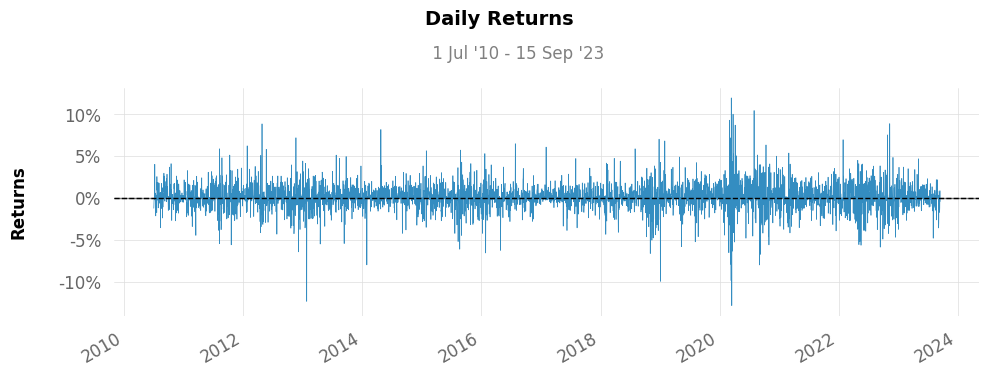






Tesla Inc. Daily Returns Plot:



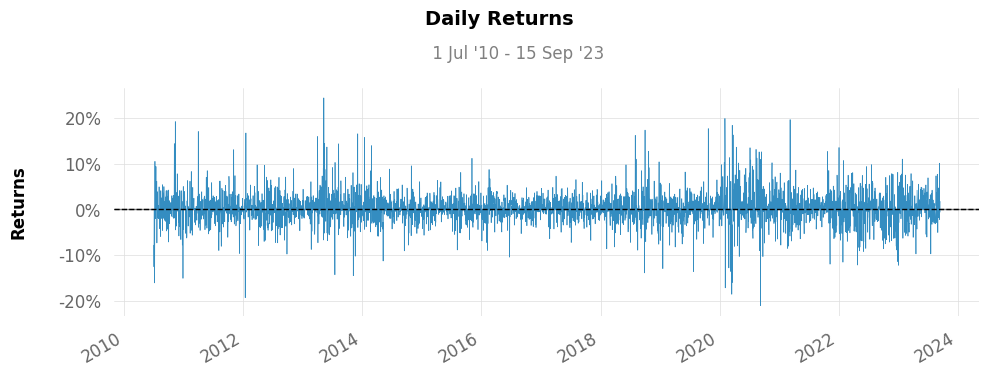






The Walt Disney Company Daily Returns Plot:



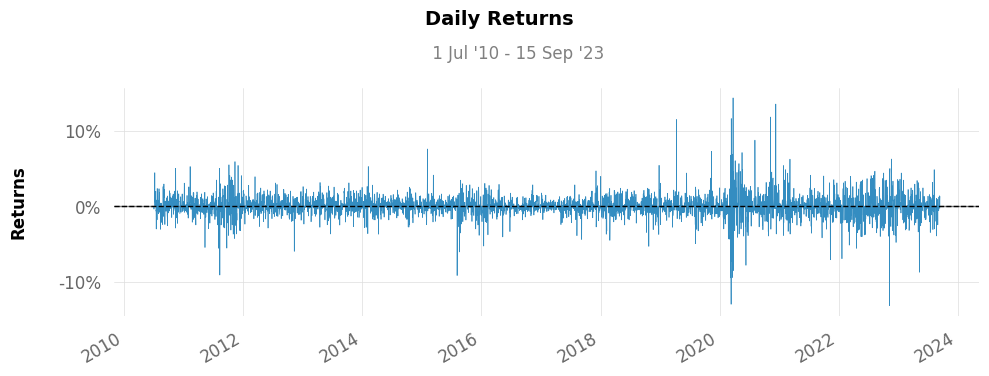






Advances Micro Devices, Inc. Daily Returns Plot:



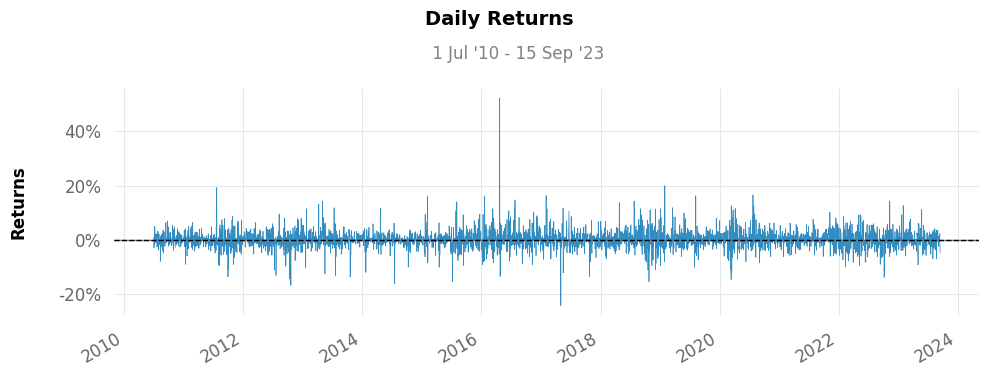

In [ ]:
print('\n')
print('\nApple Daily Returns Plot:\n')
qs.plots.daily_returns(aapl,benchmark=None)
print('\n')
print('\n')
print('\nTesla Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(tsla,benchmark=None)
print('\n')
print('\n')
print('\nThe Walt Disney Company Daily Returns Plot:\n')
qs.plots.daily_returns(dis,benchmark=None)
print('\n')
print('\n')
print('\nAdvances Micro Devices, Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(amd,benchmark=None)





Royal Bank of Canada Daily Returns Plot:



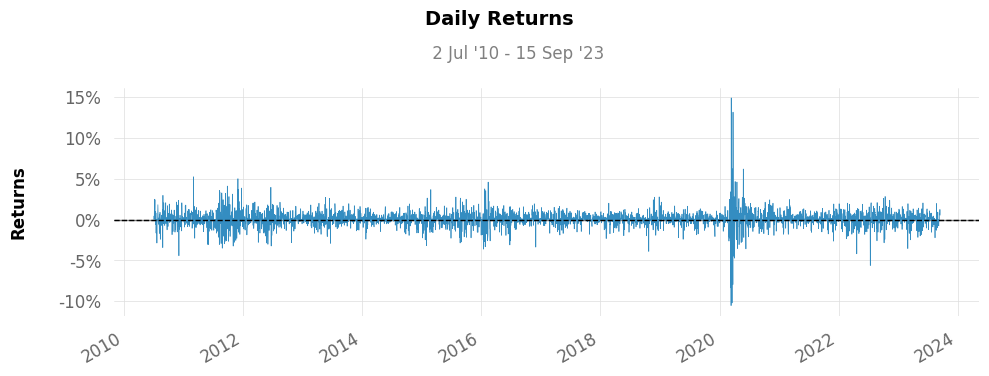






Toronto Dominion. Daily Returns Plot:



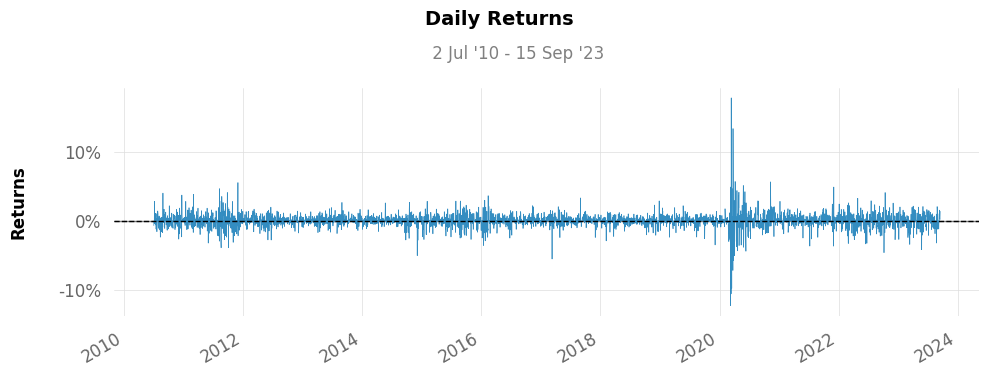






Scotia Bank Plot:



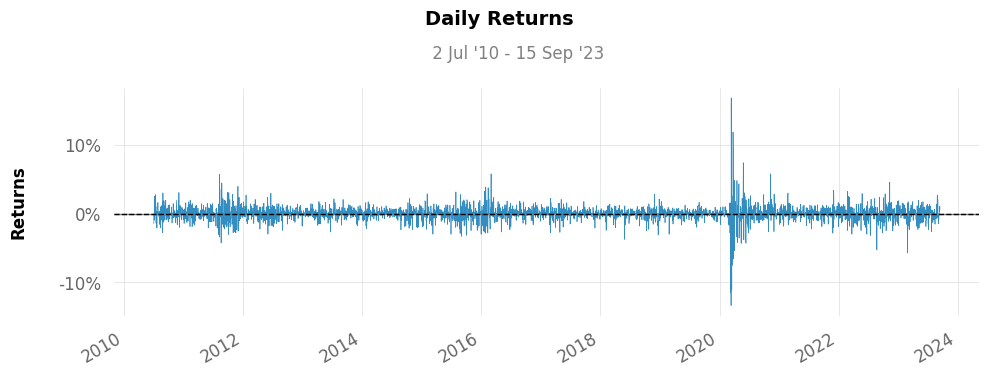






Bank of Montreal, Inc. Daily Returns Plot:



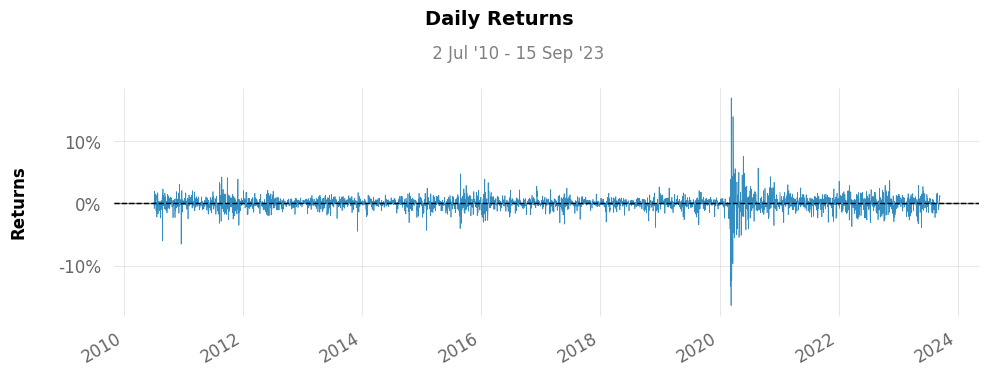

In [ ]:
print('\n')
print('\nRoyal Bank of Canada Daily Returns Plot:\n')
qs.plots.daily_returns(rbc,benchmark=None)
print('\n')
print('\n')
print('\nToronto Dominion. Daily Returns Plot:\n')
qs.plots.daily_returns(td,benchmark=None)
print('\n')
print('\n')
print('\nScotia Bank Plot:\n')
qs.plots.daily_returns(bns,benchmark=None)
print('\n')
print('\n')
print('\nBank of Montreal, Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(bmo,benchmark=None)


Apple Cumulative Returns Plot



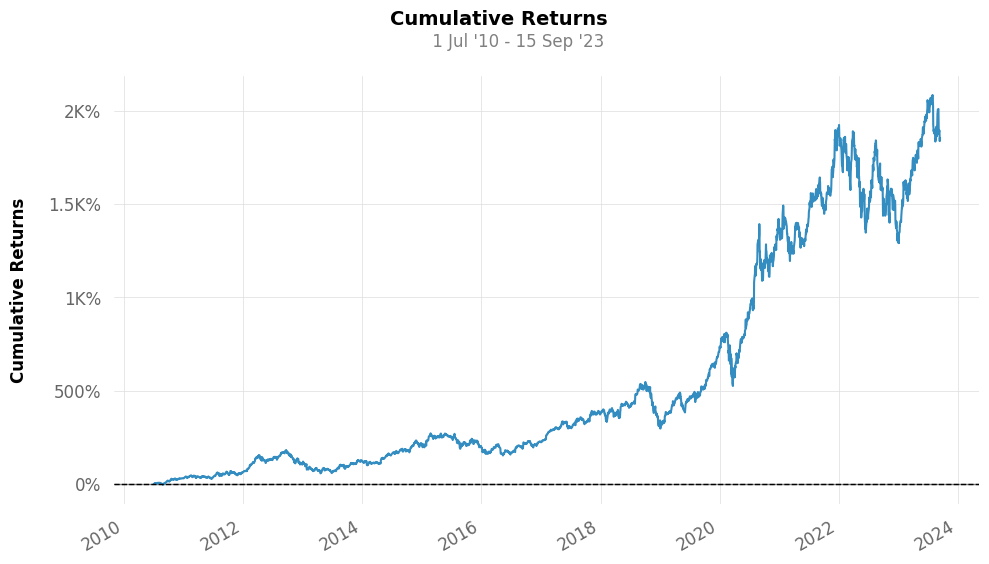


Tesla Inc. Cumulative Returns Plot



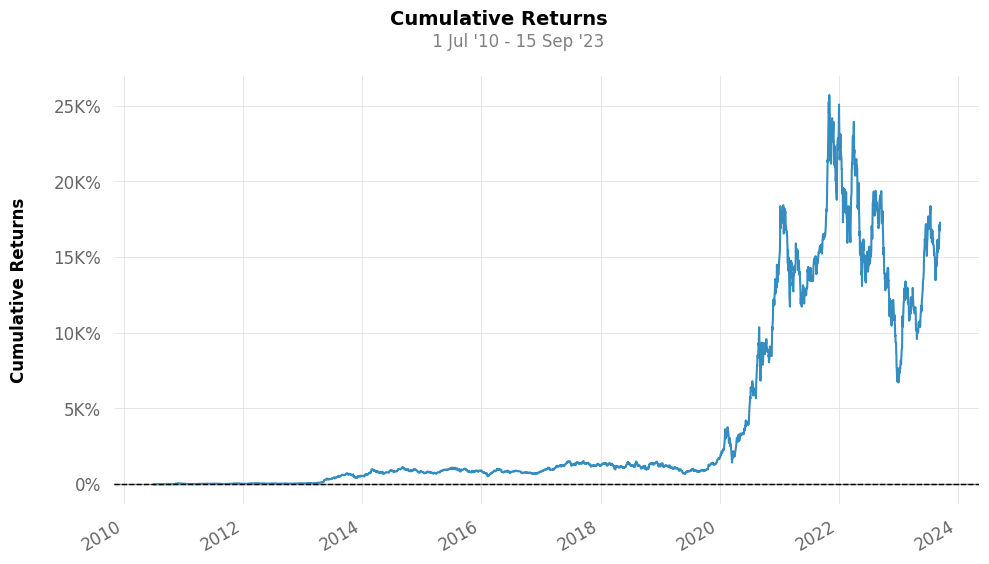


The Walt Disney Company Cumulative Returns Plot



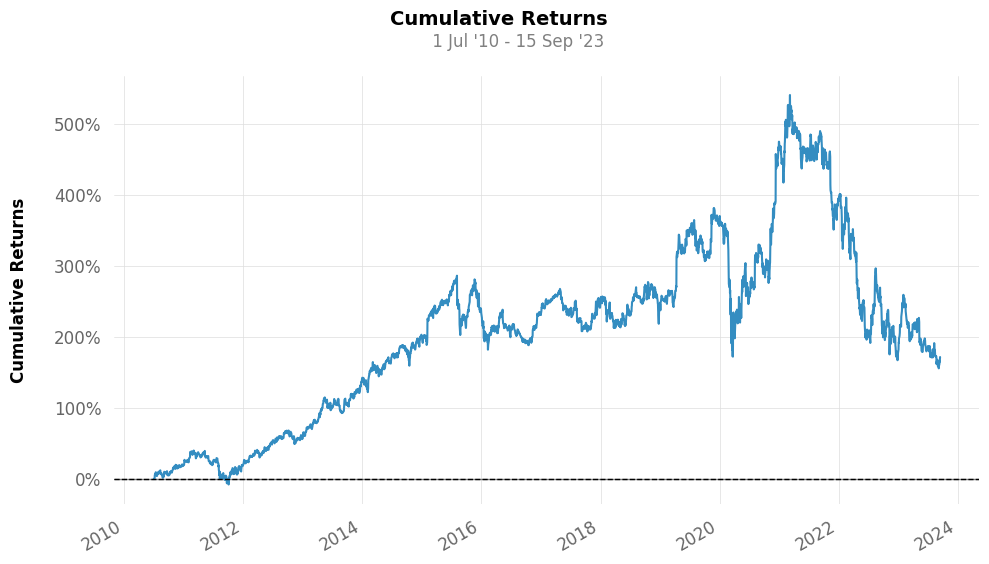


Advances Micro Devices, Inc. Cumulative Returns Plot



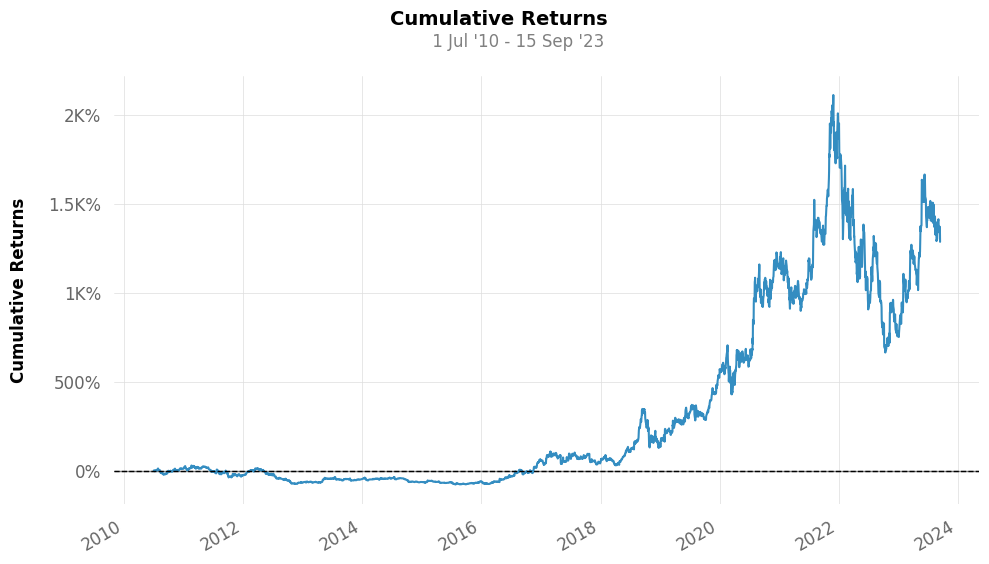

In [ ]:
# Plotting Cumulative Returns for each stock
print('\nApple Cumulative Returns Plot\n')
qs.plots.returns(aapl)
print('\nTesla Inc. Cumulative Returns Plot\n')
qs.plots.returns(tsla)
print('\nThe Walt Disney Company Cumulative Returns Plot\n')
qs.plots.returns(dis)
print('\nAdvances Micro Devices, Inc. Cumulative Returns Plot\n')
qs.plots.returns(amd)


Apple Daily Returns Histogram


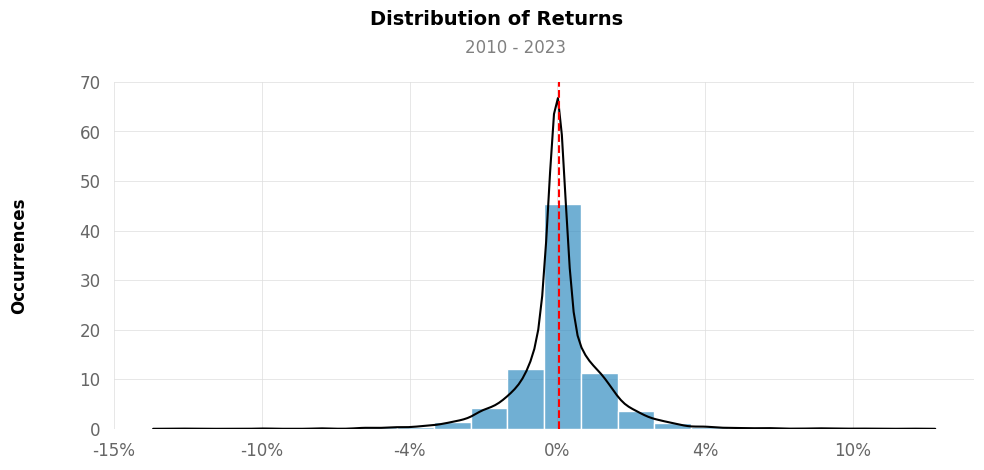


Tesla Inc. Daily Returns Histogram


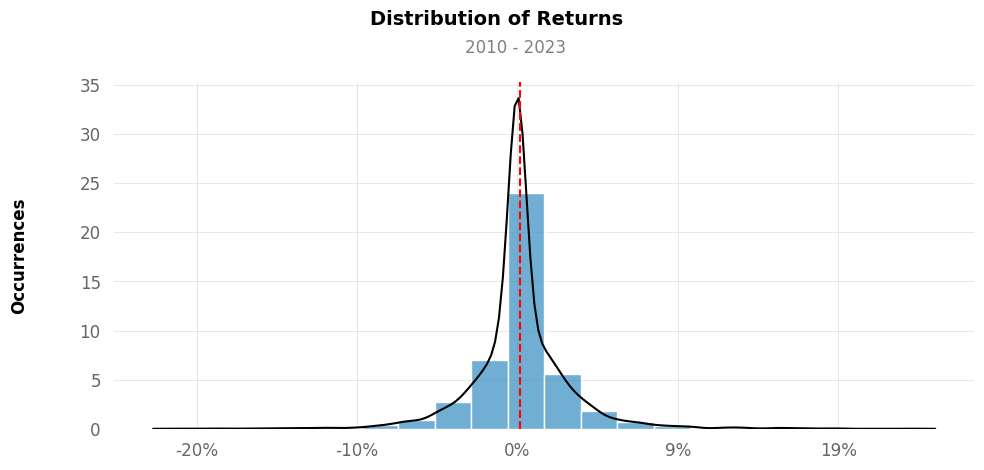


The Walt Disney Company Daily Returns Histogram


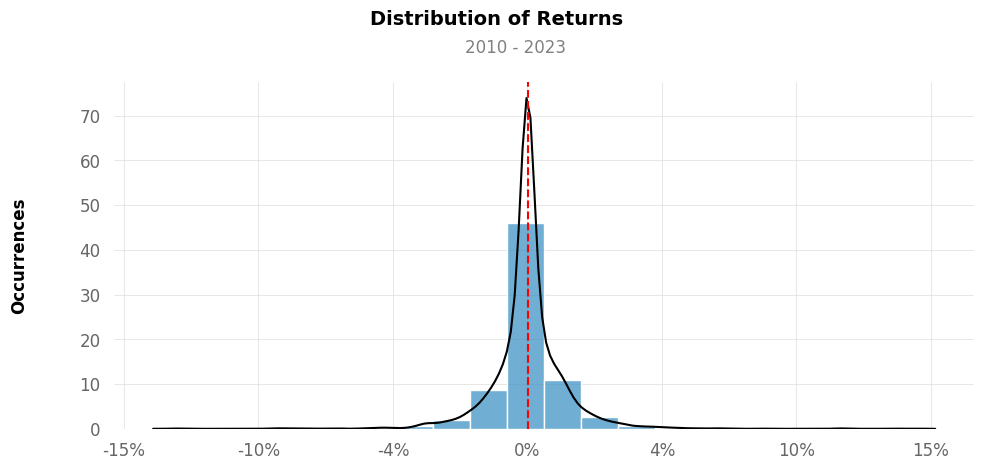


Advances Micro Devices, Inc. Daily Returns Histogram


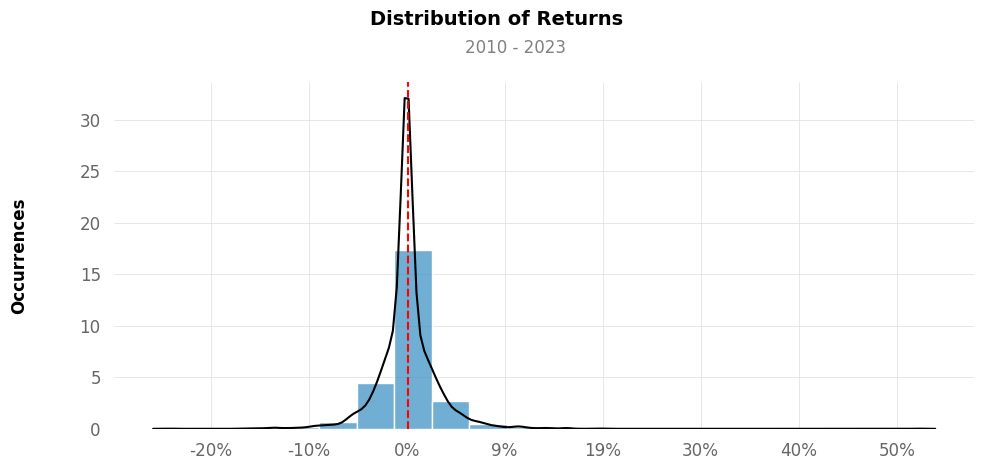

In [ ]:
# Plotting histograms
print('\nApple Daily Returns Histogram')
qs.plots.histogram(aapl, resample = 'D')

print('\nTesla Inc. Daily Returns Histogram')
qs.plots.histogram(tsla, resample = 'D')

print('\nThe Walt Disney Company Daily Returns Histogram')
qs.plots.histogram(dis, resample = 'D')

print('\nAdvances Micro Devices, Inc. Daily Returns Histogram')
qs.plots.histogram(amd, resample = 'D')


Royal Bank of Canada Daily Returns Histogram


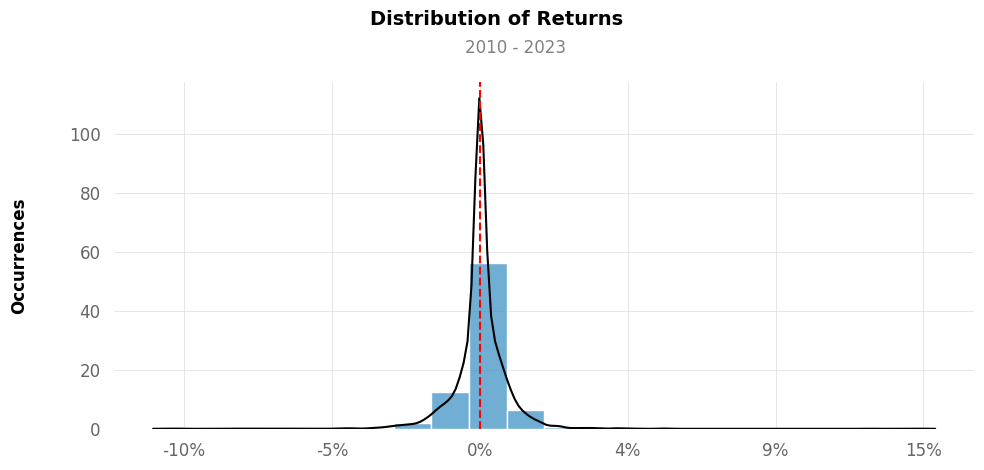


Toronto Dominion Inc. Daily Returns Histogram


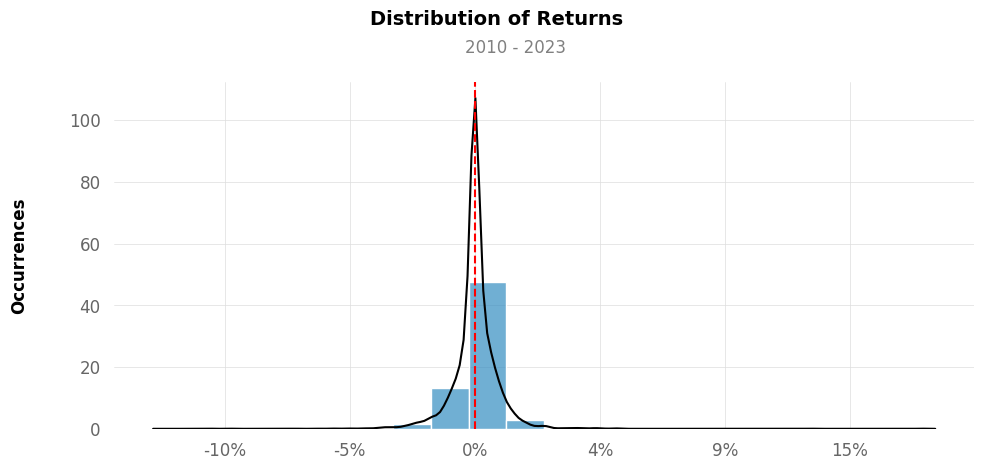


Scotia Bank Company Daily Returns Histogram


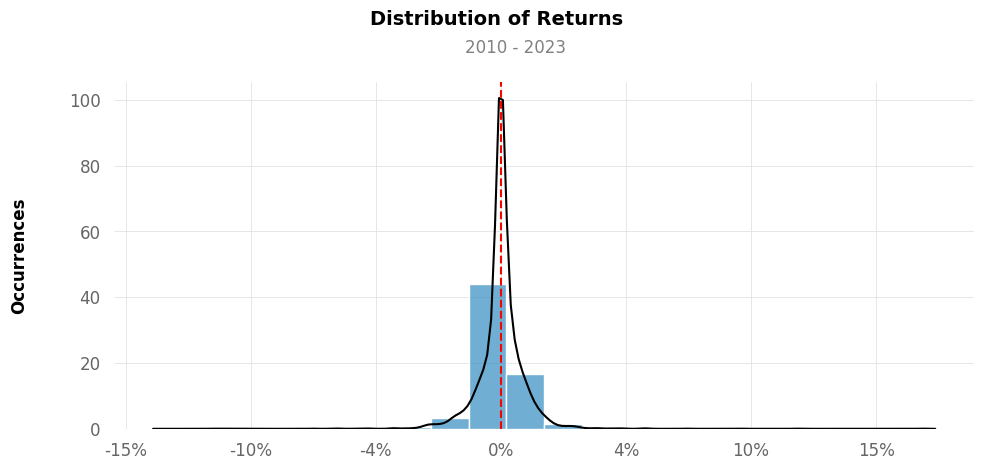


Bank of Montreal Daily Returns Histogram


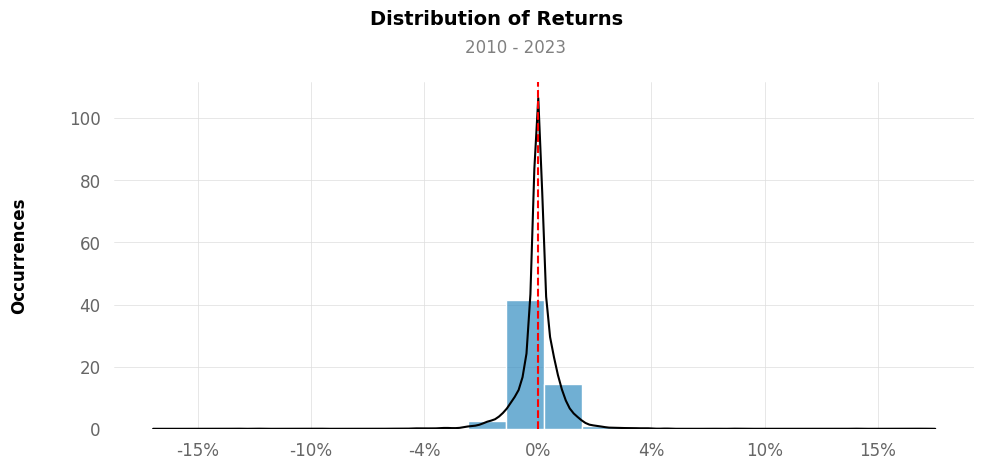

In [ ]:
# Plotting histograms
print('\nRoyal Bank of Canada Daily Returns Histogram')
qs.plots.histogram(rbc, resample = 'D')

print('\nToronto Dominion Inc. Daily Returns Histogram')
qs.plots.histogram(td, resample = 'D')

print('\nScotia Bank Company Daily Returns Histogram')
qs.plots.histogram(bns, resample = 'D')

print('\nBank of Montreal Daily Returns Histogram')
qs.plots.histogram(bmo, resample = 'D')

In [ ]:
# Calculating Standard Deviations

print("Apple's Standard Deviation from 2010 to 2023: ", aapl.std().round(3))

print("\nTesla's Standard Deviation from 2010 to 2023: ", tsla.std().round(3))

print("\nDisney's Standard Deviation from 2010 to 2023: ", dis.std().round(3))

print("\nAMD's Standard Deviation from 2010 to 2023: ", amd.std().round(3))

Apple's Standard Deviation from 2010 to 2023:  0.018

Tesla's Standard Deviation from 2010 to 2023:  0.036

Disney's Standard Deviation from 2010 to 2023:  0.016

AMD's Standard Deviation from 2010 to 2023:  0.036


In [ ]:
# Calculating Standard Deviations

print("Royal Bank of Canada Standard Deviation from 2010 to 2023: ", rbc.std().round(3))

print("\nToronto Dominion Standard Deviation from 2010 to 2023: ", td.std().round(3))

print("\nBank of Nova Scotia Standard Deviation from 2010 to 2023: ", bns.std().round(3))

print("\nBank of Montreal Standard Deviation from 2010 to 2023: ", bmo.std().round(3))

Royal Bank of Canada Standard Deviation from 2010 to 2023:  0.011

Toronto Dominion Standard Deviation from 2010 to 2023:  0.011

Bank of Nova Scotia Standard Deviation from 2010 to 2023:  0.012

Bank of Montreal Standard Deviation from 2010 to 2023:  0.012


In [ ]:
# Merging daily returns into one dataframe
merged_df = pd.concat([aapl, tsla, dis, amd], join = 'outer', axis = 1)
merged_df.columns = ['aapl', 'tsla', 'dis', 'amd']
merged_df # Displaying dataframe

aapl      tsla       dis       amd
Date                                              
2010-07-01 -0.012126 -0.078473 -0.000317  0.009563
2010-07-02 -0.006198 -0.125683 -0.003493 -0.029770
2010-07-06  0.006844 -0.160937  0.010835 -0.018131
2010-07-07  0.040381 -0.019243  0.044767  0.049716
2010-07-08 -0.002242  0.105064  0.006035 -0.002706
...              ...       ...       ...       ...
2023-09-11  0.006623  0.100925  0.011522 -0.007258
2023-09-12 -0.017061 -0.022297  0.014057 -0.000095
2023-09-13 -0.011855  0.014281 -0.002390  0.022790
2023-09-14  0.008782  0.017472  0.011979 -0.010027
2023-09-15 -0.004154 -0.005977  0.013021 -0.048204

[3325 rows x 4 columns]

In [ ]:
# Merging daily returns into one dataframe
merged1_df = pd.concat([rbc, td, bns, bmo], join = 'outer', axis = 1)
merged1_df.columns = ['rbc', 'td', 'bns', 'bmo']
merged1_df # Displaying dataframe

rbc        td       bns       bmo
Date                                              
2010-07-02  0.004142 -0.006814 -0.014271  0.002251
2010-07-05  0.003732 -0.003795 -0.009307 -0.007949
2010-07-06  0.024853  0.028278  0.025470  0.019857
2010-07-07  0.001719  0.013394  0.003665  0.012126
2010-07-08  0.011819 -0.003093  0.008114 -0.003206
...              ...       ...       ...       ...
2023-09-11  0.002498  0.015503  0.007090  0.012348
2023-09-12  0.006811  0.003053  0.002973  0.005104
2023-09-13  0.006105  0.007793  0.010919  0.012393
2023-09-14  0.012299  0.014015  0.005709  0.012072
2023-09-15  0.005346  0.002025  0.005523  0.011172

[3314 rows x 4 columns]

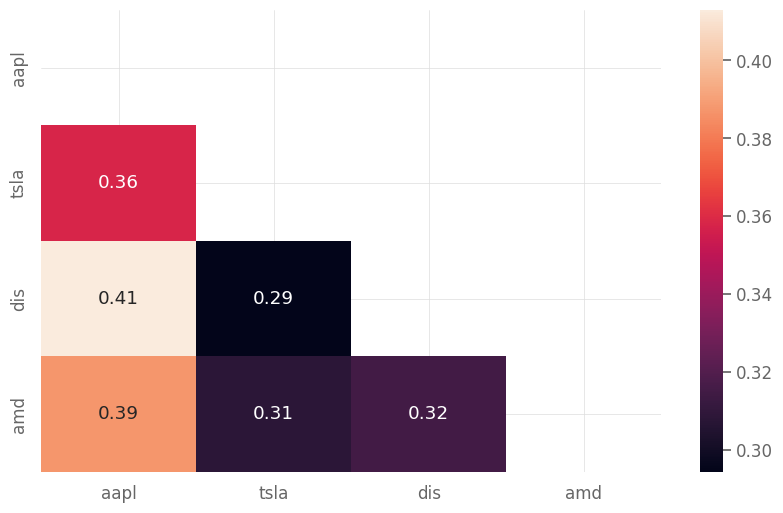

In [ ]:
# Correlation Matrix
corr = merged_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask = mask)
plt.show()

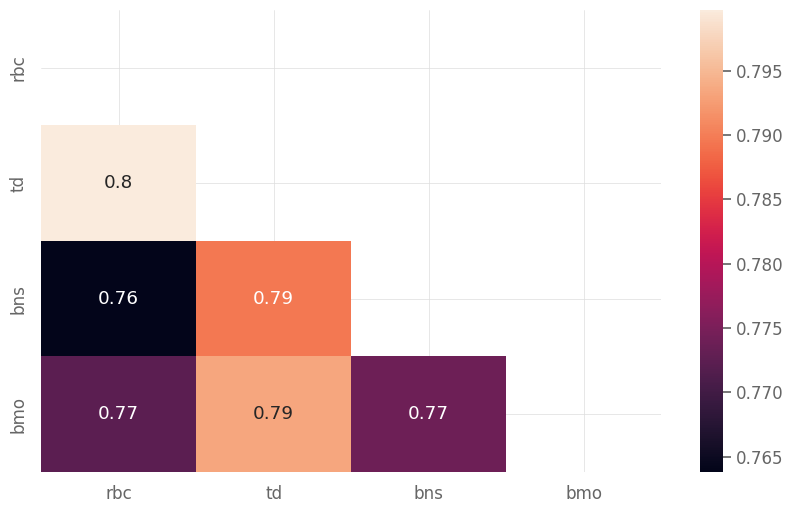

In [ ]:
corr = merged1_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask = mask)
plt.show()

In [ ]:
# Loading data from the SP500, the american benchmark
sp500 = qs.utils.download_returns('^GSPC')
sp500 = sp500.loc['2010-07-01':'2023-09-15']
sp500.index = sp500.index.tz_localize(None)
sp500

[*********************100%%**********************]  1 of 1 completed


Date
2010-07-01   -0.003240
2010-07-02   -0.004662
2010-07-06    0.005359
2010-07-07    0.031331
2010-07-08    0.009413
                ...   
2023-09-11    0.006723
2023-09-12   -0.005696
2023-09-13    0.001242
2023-09-14    0.008430
2023-09-15   -0.012160
Name: Close, Length: 3325, dtype: float64

In [ ]:
# Loading data from the S&P/TSX Composite index, the Canadian benchmark
tsx = qs.utils.download_returns('^GSPTSE')
tsx = tsx.loc['2010-07-01':'2023-09-15']
tsx.index = tsx.index.tz_localize(None)
tsx

[*********************100%%**********************]  1 of 1 completed


Date
2010-07-02   -0.008703
2010-07-05   -0.009253
2010-07-06    0.009709
2010-07-07    0.017598
2010-07-08    0.003167
                ...   
2023-09-11    0.005385
2023-09-12    0.001997
2023-09-13    0.002759
2023-09-14    0.014246
2023-09-15    0.002650
Name: Close, Length: 3314, dtype: float64

In [ ]:
# Removing indexes
sp500_no_index = sp500.reset_index(drop = True)
aapl_no_index = aapl.reset_index(drop = True)
tsla_no_index = tsla.reset_index(drop = True)
dis_no_index = dis.reset_index(drop = True)
amd_no_index = amd.reset_index(drop = True)

In [ ]:
# Removing indexes
tsx_no_index = tsx.reset_index(drop = True)
rbc_no_index = rbc.reset_index(drop = True)
td_no_index = td.reset_index(drop = True)
bns_no_index = bns.reset_index(drop = True)
bmo_no_index = bmo.reset_index(drop = True)

In [ ]:
aapl_no_index
rbc_no_index

0       0.004142
1       0.003732
2       0.024853
3       0.001719
4       0.011819
          ...   
3309    0.002498
3310    0.006811
3311    0.006105
3312    0.012299
3313    0.005346
Name: Close, Length: 3314, dtype: float64

In [ ]:
sp500_no_index
tsx_no_index

0      -0.008703
1      -0.009253
2       0.009709
3       0.017598
4       0.003167
          ...   
3309    0.005385
3310    0.001997
3311    0.002759
3312    0.014246
3313    0.002650
Name: Close, Length: 3314, dtype: float64

In [ ]:
# Fitting linear relation among Apple's returns and Benchmark
X = sp500_no_index.values.reshape(-1,1)
y = aapl_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_

print('AAPL beta: ', beta.round(3))
print('\nAAPL alpha: ', alpha.round(3))

AAPL beta:  [1.113]

AAPL alpha:  [0.]


In [ ]:
# Fitting linear relation among Apple's returns and Benchmark
X = tsx_no_index.values.reshape(-1,1)
y = rbc_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_

print('RBC beta: ', beta.round(3))
print('\nRBC alpha: ', alpha.round(3))

RBC beta:  [0.907]

RBC alpha:  [0.]


In [ ]:
# Fitting linear relation among Tesla's returns and Benchmark
X = sp500_no_index.values.reshape(-1,1)
y = tsla_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_

print('TSLA beta: ', beta.round(3))
print('\nTSLA alpha: ', alpha.round(3))

TSLA beta:  [1.399]

TSLA alpha:  [0.001]


In [ ]:
# Fitting linear relation among Walt Disney's returns and Benchmark
X = sp500_no_index.values.reshape(-1,1)
y = dis_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_

print('Walt Disney Company beta: ', beta.round(3))
print('\nWalt Disney Company alpha: ', alpha.round(4))

Walt Disney Company beta:  [1.029]

Walt Disney Company alpha:  [-0.0001]


In [ ]:
# Fitting linear relation among AMD's returns and Benchmark
X = sp500_no_index.values.reshape(-1,1)
y = amd_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_

print('AMD beta: ', beta.round(3))
print('\nAMD alpha: ', alpha.round(4))

AMD beta:  [1.606]

AMD alpha:  [0.0006]


In [ ]:
# Calculating Sharpe ratio
print("Sharpe Ratio for AAPL: ", qs.stats.sharpe(aapl).round(2))
print("Sharpe Ratio for TSLA: ", qs.stats.sharpe(tsla).round(2))
print("Sharpe Ratio for DIS: ", qs.stats.sharpe(dis).round(2))
print("Sharpe Ratio for AMD: ", qs.stats.sharpe(amd).round(2))

Sharpe Ratio for AAPL:  0.94
Sharpe Ratio for TSLA:  0.97
Sharpe Ratio for DIS:  0.42
Sharpe Ratio for AMD:  0.63


In [ ]:
# Calculating Sharpe ratio
print("Sharpe Ratio for RBC: ", qs.stats.sharpe(rbc).round(2))
print("Sharpe Ratio for TD: ", qs.stats.sharpe(td).round(2))
print("Sharpe Ratio for BNS: ", qs.stats.sharpe(bns).round(2))
print("Sharpe Ratio for BMO: ", qs.stats.sharpe(bmo).round(2))

Sharpe Ratio for RBC:  0.48
Sharpe Ratio for TD:  0.46
Sharpe Ratio for BNS:  0.21
Sharpe Ratio for BMO:  0.39


# MAKE PORTFOLIO(COLLECTION OF STOCKS AND BONDS)

In [ ]:
weights = [0.25, 0.25, 0.25, 0.25] # Defining weights for each stock
portfolio_usa = aapl*weights[0] + tsla*weights[1] + dis*weights[2] + amd*weights[3] # Creating portfolio multiplying each stock for its respective weight
portfolio_usa # Displaying portfolio's daily returns

Date
2010-07-01   -0.020338
2010-07-02   -0.041286
2010-07-06   -0.040347
2010-07-07    0.028905
2010-07-08    0.026538
                ...   
2023-09-11    0.027953
2023-09-12   -0.006349
2023-09-13    0.005707
2023-09-14    0.007051
2023-09-15   -0.011329
Name: Close, Length: 3325, dtype: float64

In [ ]:
weights = [0.25, 0.25, 0.25, 0.25] # Defining weights for each stock
portfolio_can = rbc*weights[0] + td*weights[1] + bns*weights[2] + bmo*weights[3] # Creating portfolio multiplying each stock for its respective weight
portfolio_can # Displaying portfolio's daily returns

Date
2010-07-02   -0.003673
2010-07-05   -0.004330
2010-07-06    0.024615
2010-07-07    0.007726
2010-07-08    0.003408
                ...   
2023-09-11    0.009360
2023-09-12    0.004485
2023-09-13    0.009302
2023-09-14    0.011024
2023-09-15    0.006017
Name: Close, Length: 3314, dtype: float64

[Performance Metrics]



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-07-01   2010-07-01
End Period                 2023-09-15   2023-09-15
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          331.77%      3,670.20%
CAGR﹪                     7.94%        20.88%

Sharpe                     0.72         1.06
Prob. Sharpe Ratio         99.51%       99.99%
Smart Sharpe               0.7          1.02
Sortino                    1.01         1.55
Smart Sortino              0.98         1.5
Sortino/√2                 0.71         1.1
Smart Sortino/√2           0.69         1.06
Omega                      1.2          1.2

Max Drawdown               -33.92%      -52.28%
Longest DD Days            620          620
Volatility (ann.)          17.5%        30.4%
R^2                        0.55         0.55
Information Ratio          0.06         0.06
Calmar              

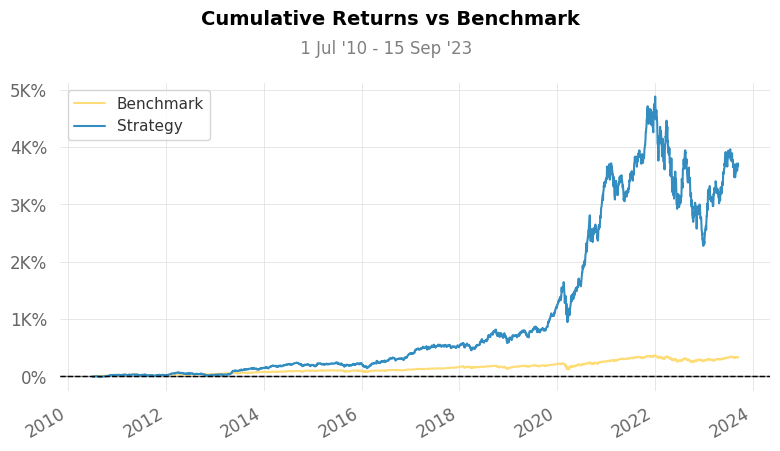

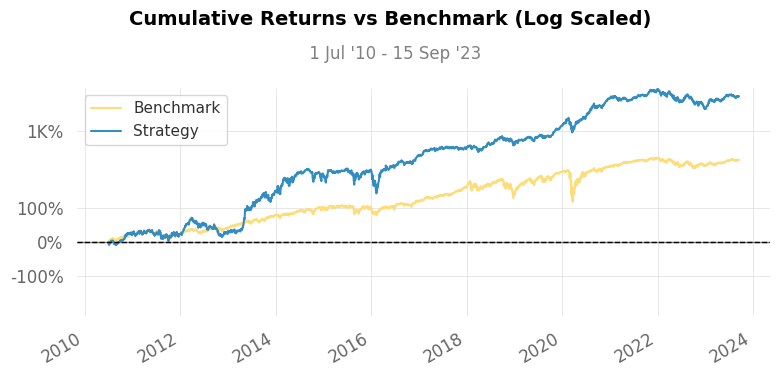

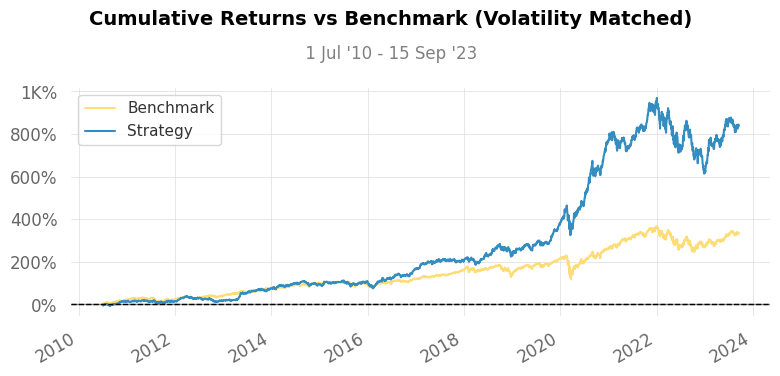

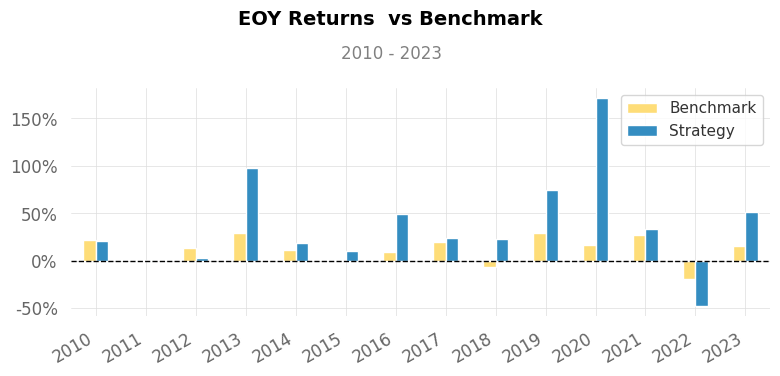

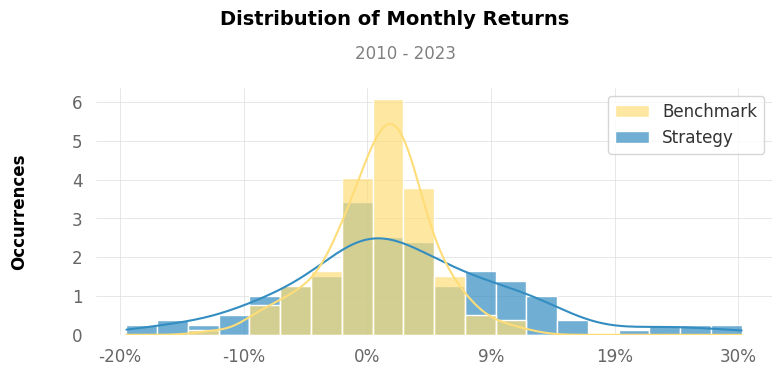

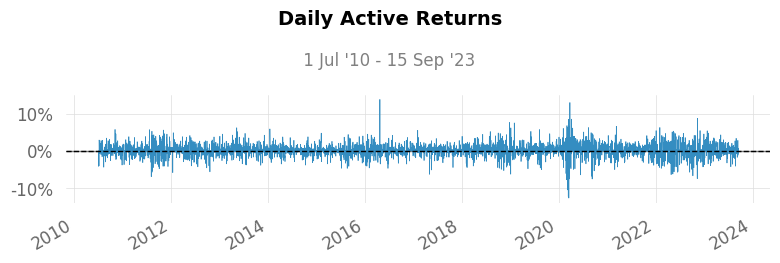

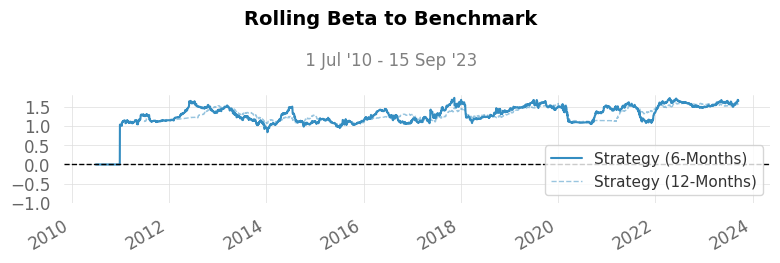

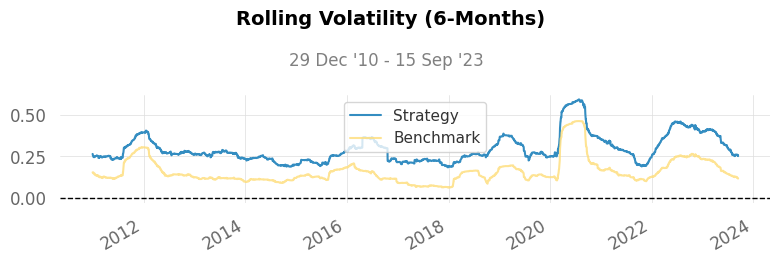

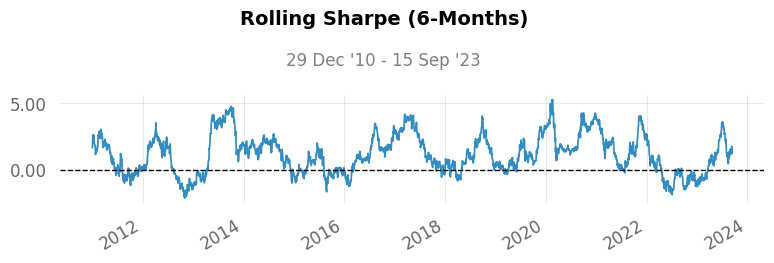

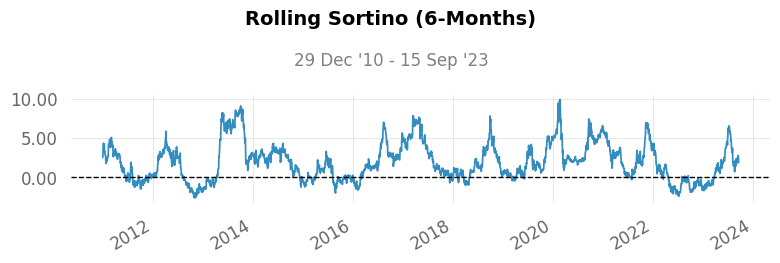

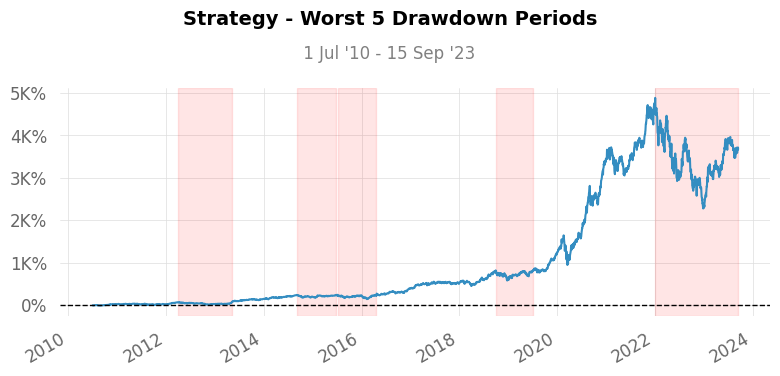

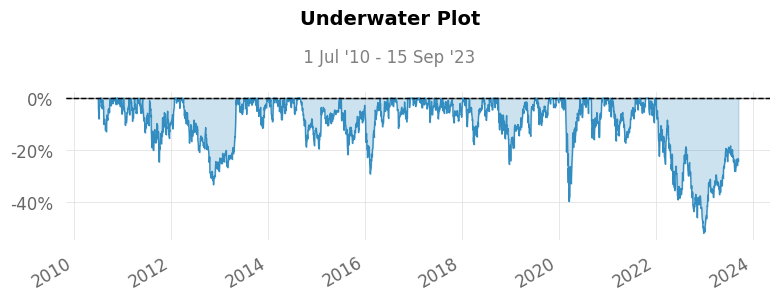

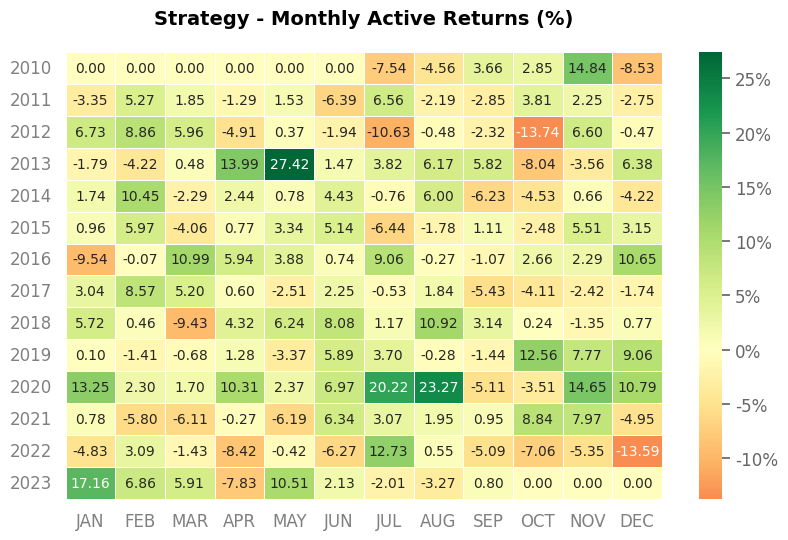

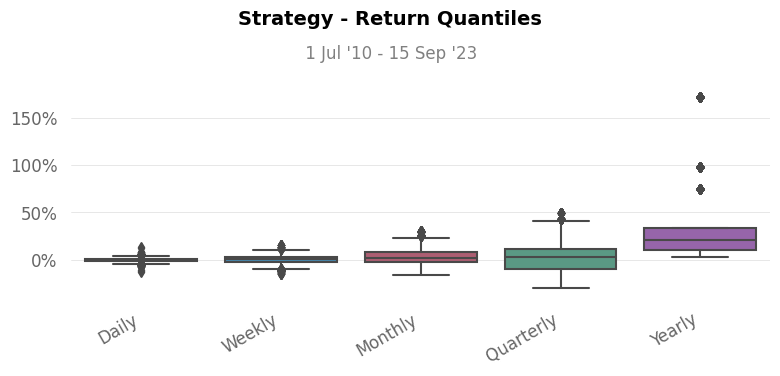

In [ ]:
qs.reports.full(portfolio_usa, benchmark = sp500)

[Performance Metrics]



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-07-02   2010-07-02
End Period                 2023-09-15   2023-09-15
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          82.59%       109.4%
CAGR﹪                     3.2%         3.94%

Sharpe                     0.38         0.42
Prob. Sharpe Ratio         91.58%       93.63%
Smart Sharpe               0.36         0.4
Sortino                    0.52         0.59
Smart Sortino              0.49         0.56
Sortino/√2                 0.37         0.42
Smart Sortino/√2           0.35         0.4
Omega                      1.09         1.09

Max Drawdown               -37.43%      -39.24%
Longest DD Days            1063         883
Volatility (ann.)          14.73%       16.71%
R^2                        0.69         0.69
Information Ratio          0.01         0.01
Calmar                

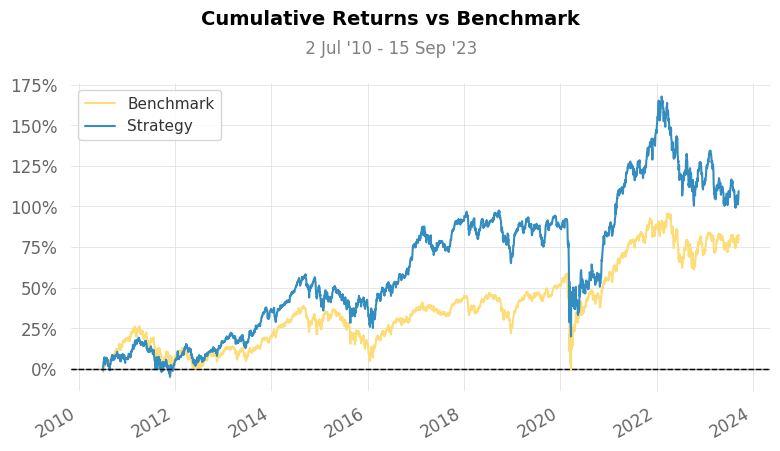

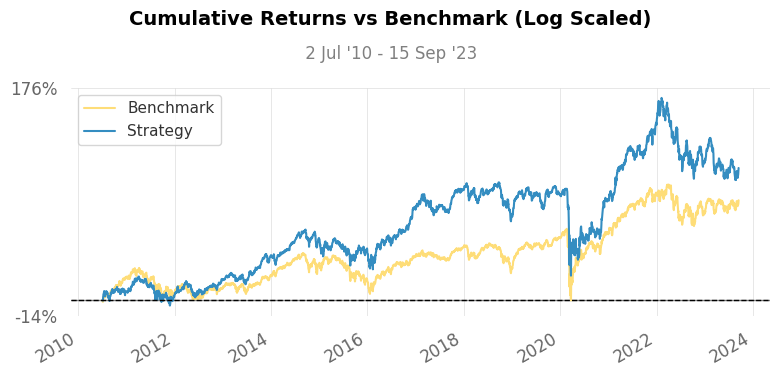

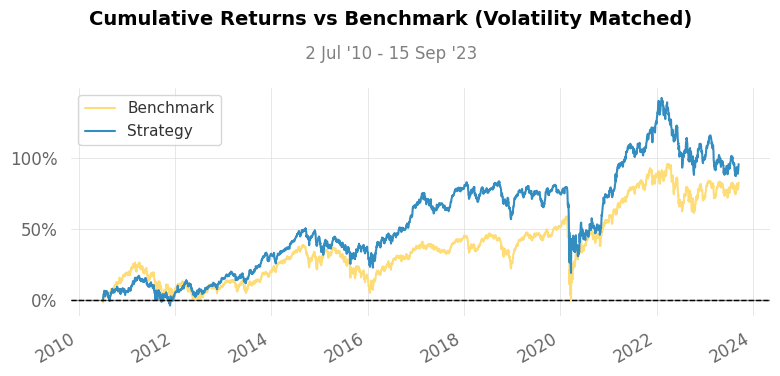

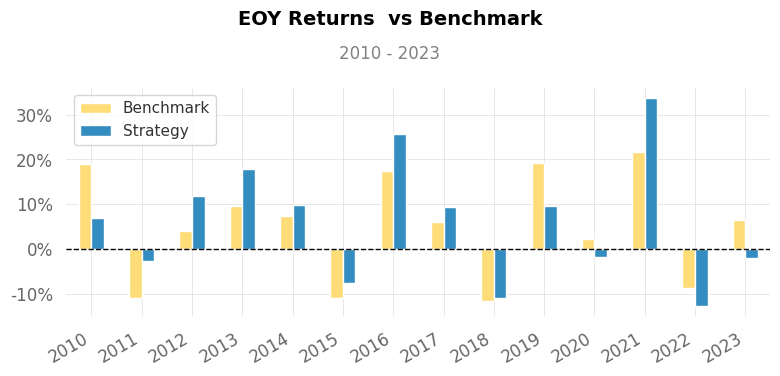

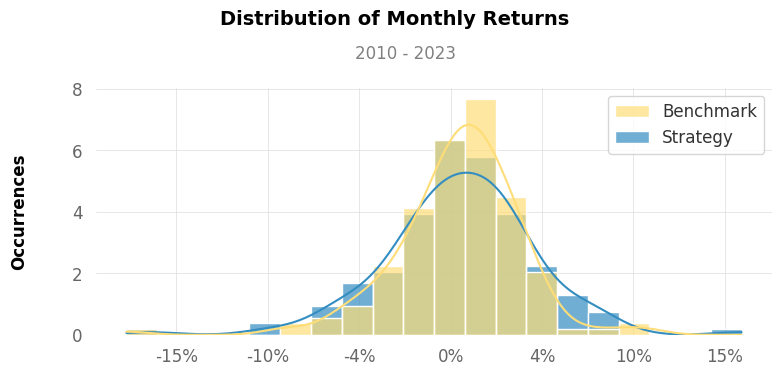

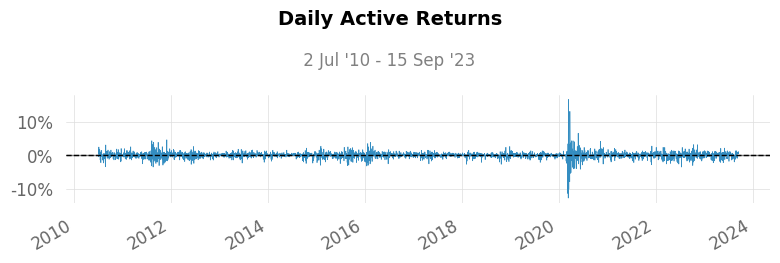

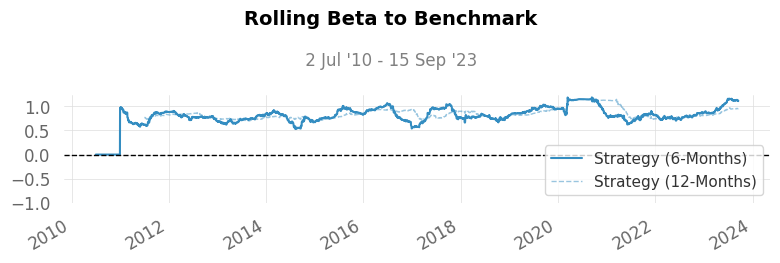

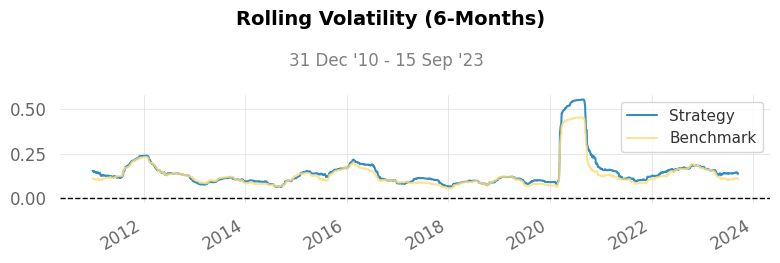

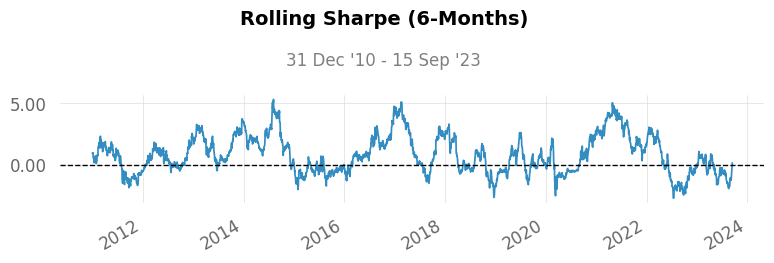

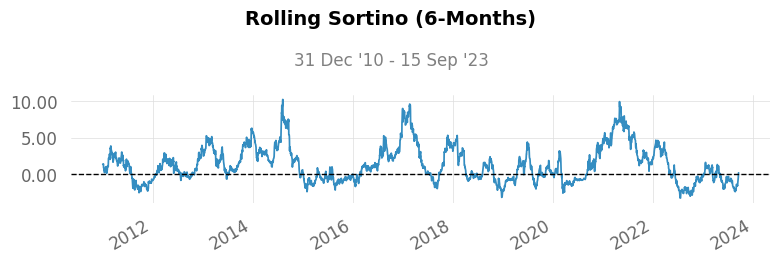

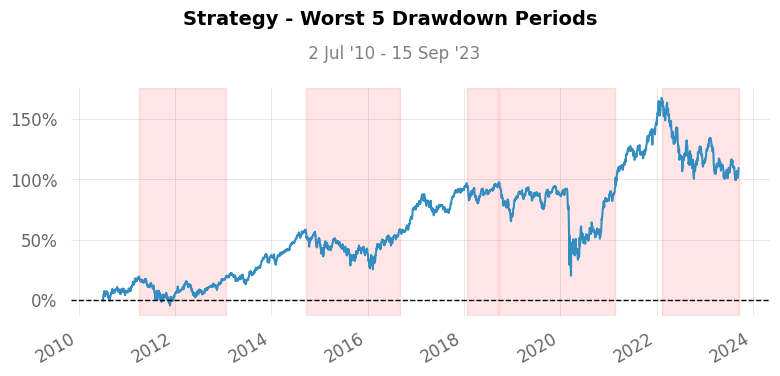

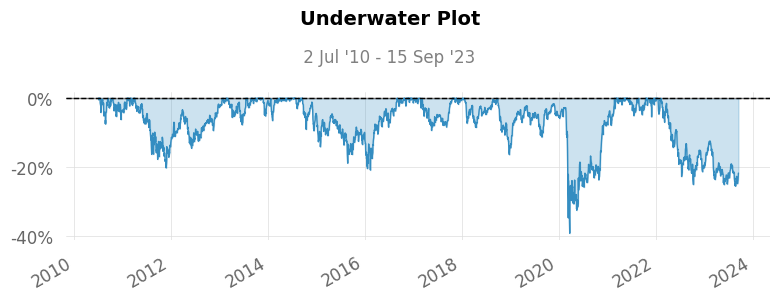

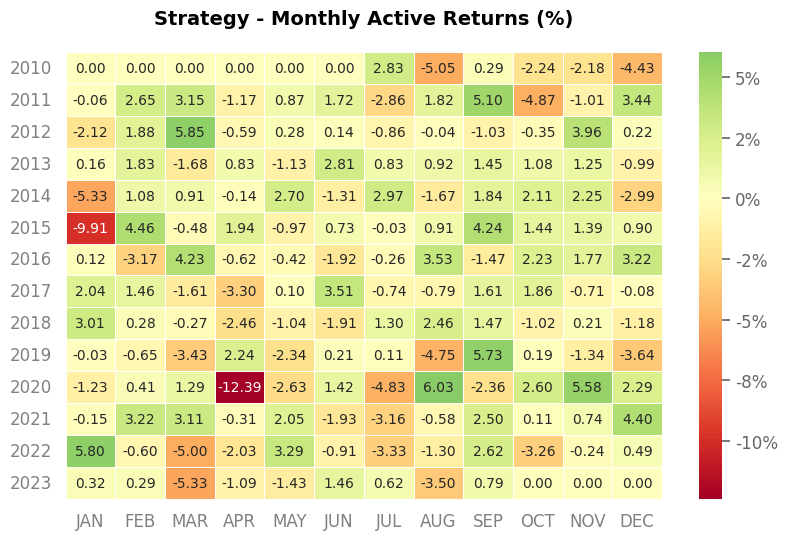

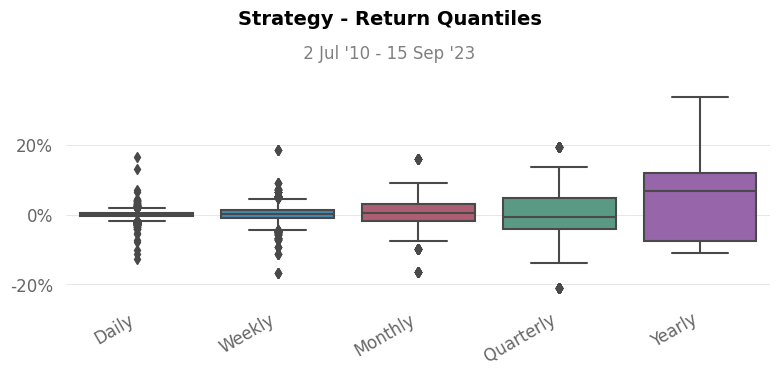

In [ ]:
qs.reports.full(portfolio_can, benchmark = tsx)

In [ ]:
# installing PyPortfolioOpt
!pip install pyportfolioopt

In [ ]:
# Getting dataframes info for Stocks using yfinance
aapl_df = yf.download('AAPL', start = '2010-07-01', end = '2023-09-15')
tsla_df = yf.download('TSLA', start = '2010-07-01', end = '2023-09-15')
dis_df = yf.download('DIS', start = '2010-07-01', end = '2023-09-15')
amd_df = yf.download('AMD', start = '2010-07-01', end = '2023-09-15')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Getting dataframes info for Stocks using yfinance
rbc_df = yf.download('RY.TO', start = '2010-07-01', end = '2023-09-15')
td_df = yf.download('TD.TO', start = '2010-07-01', end = '2023-09-15')
bns_df = yf.download('BNS.TO', start = '2010-07-01', end = '2023-09-15')
bmo_df = yf.download('BMO.TO', start = '2010-07-01', end = '2023-09-15')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Extracting Adjusted Close for each stock
aapl_df = aapl_df['Adj Close']
tsla_df = tsla_df['Adj Close']
dis_df = dis_df['Adj Close']
amd_df = amd_df['Adj Close']

In [ ]:
# Extracting Adjusted Close for each stock
rbc_df = rbc_df['Adj Close']
td_df = td_df['Adj Close']
bns_df = bns_df['Adj Close']
bmo_df = bmo_df['Adj Close']

In [ ]:
# Merging and creating an Adj Close dataframe for stocks
df_us = pd.concat([aapl_df, tsla_df, dis_df, amd_df], join = 'outer', axis = 1)
df_us.columns = ['aapl', 'tsla', 'dis', 'amd']
df_us # Visualizing dataframe for input

aapl        tsla        dis         amd
Date                                                     
2010-07-01    7.532460    1.464000  27.428722    7.390000
2010-07-02    7.485781    1.280000  27.332909    7.170000
2010-07-06    7.537010    1.074000  27.629059    7.040000
2010-07-07    7.841364    1.053333  28.865923    7.390000
2010-07-08    7.823782    1.164000  29.040127    7.370000
...                ...         ...        ...         ...
2023-09-08  178.179993  248.500000  81.580002  106.089996
2023-09-11  179.360001  273.579987  82.519997  105.320000
2023-09-12  176.300003  267.480011  83.680000  105.309998
2023-09-13  174.210007  271.299988  83.480003  107.709999
2023-09-14  175.740005  276.040009  84.480003  106.629997

[3324 rows x 4 columns]

In [ ]:
# Merging and creating an Adj Close dataframe for stocks
df_can = pd.concat([rbc_df, td_df, bns_df, bmo_df], join = 'outer', axis = 1)
df_can.columns = ['rbc', 'td', 'bns', 'bmo']
df_can # Visualizing dataframe for input

rbc         td        bns         bmo
Date                                                    
2010-07-02   30.275545  20.846668  26.774504   32.969608
2010-07-05   30.388536  20.767550  26.525301   32.707539
2010-07-06   31.143791  21.354826  27.200886   33.357014
2010-07-07   31.197319  21.640858  27.300570   33.761524
2010-07-08   31.566013  21.573910  27.522068   33.653275
...                ...        ...        ...         ...
2023-09-08  120.099998  80.629997  63.470001  114.190002
2023-09-11  120.400002  81.879997  63.919998  115.599998
2023-09-12  121.220001  82.129997  64.110001  116.190002
2023-09-13  121.959999  82.769997  64.809998  117.629997
2023-09-14  123.459999  83.930000  65.180000  119.050003

[3313 rows x 4 columns]

In [ ]:
# Importing libraries for portfolio optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
# Calculating expected annualized returns and annualized sample covariance matrix
mu_us = expected_returns.mean_historical_return(df_us) #expected returns
S_us = risk_models.sample_cov(df_us) #Covariance matrix
print(mu_us)
print(S_us)

aapl    0.269806
tsla    0.487844
dis     0.089053
amd     0.224364
dtype: float64
          aapl      tsla       dis       amd
aapl  0.079939  0.057876  0.030582  0.062184
tsla  0.057876  0.326499  0.043997  0.099902
dis   0.030582  0.043997  0.068310  0.046815
amd   0.062184  0.099902  0.046815  0.321668


In [ ]:
# Calculating expected annualized returns and annualized sample covariance matrix
mu_can = expected_returns.mean_historical_return(df_can) #expected returns
S_can = risk_models.sample_cov(df_can) #Covariance matrix

In [ ]:
# Optimizing for maximal Sharpe ratio
ef_us = EfficientFrontier(mu_us, S_us)
weights_us = ef_us.max_sharpe() # Calculating optimal weights for Sharpe ratio maximization

clean_weights_us = ef_us.clean_weights() # clean_weights rounds the weights and clips near-zeros

# Printing optimized weights and expected performance for portfolio
print(clean_weights_us)
ef_us.portfolio_performance(verbose = True)

OrderedDict([('aapl', 0.7037), ('tsla', 0.2963), ('dis', 0.0), ('amd', 0.0)])
Expected annual return: 33.4%
Annual volatility: 30.4%
Sharpe Ratio: 1.03


(0.33441128990405167, 0.3039495426118492, 1.0344193552729322)

In [ ]:
# Optimizing for maximal Sharpe ratio
ef_can = EfficientFrontier(mu_can, S_can)
weights_can = ef_can.max_sharpe() # Calculating optimal weights for Sharpe ratio maximization

clean_weights_can = ef_can.clean_weights() # clean_weights rounds the weights and clips near-zeros

# Printing optimized weights and expected performance for portfolio
print(clean_weights_can)
ef_can.portfolio_performance(verbose = True)

OrderedDict([('rbc', 0.64239), ('td', 0.35761), ('bns', 0.0), ('bmo', 0.0)])
Expected annual return: 11.2%
Annual volatility: 16.8%
Sharpe Ratio: 0.55


(0.11248719162045867, 0.16840607690143228, 0.5491915334776858)

In [ ]:
# Creating new portfolio with optimized weights
new_weights = [0.7037, 0.2963]
optimized_portfolio_us = aapl*new_weights[0] + tsla*new_weights[1]
optimized_portfolio_us

Date
2010-07-01   -0.031784
2010-07-02   -0.041601
2010-07-06   -0.042870
2010-07-07    0.022715
2010-07-08    0.029553
                ...   
2023-09-11    0.034565
2023-09-12   -0.018612
2023-09-13   -0.004111
2023-09-14    0.011357
2023-09-15   -0.004694
Name: Close, Length: 3325, dtype: float64

In [ ]:
# Creating new portfolio with optimized weights
new_weights = [0.64239, 0.35761]
optimized_portfolio_can = rbc*new_weights[0] + td*new_weights[1]
optimized_portfolio_can

Date
2010-07-02    0.000224
2010-07-05    0.001040
2010-07-06    0.026078
2010-07-07    0.005894
2010-07-08    0.006486
                ...   
2023-09-11    0.007149
2023-09-12    0.005467
2023-09-13    0.006708
2023-09-14    0.012913
2023-09-15    0.004158
Name: Close, Length: 3314, dtype: float64

[Performance Metrics]

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-07-01   2010-07-01
End Period                 2023-09-15   2023-09-15
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          3,670.20%    5,426.04%
CAGR﹪                     20.88%       23.32%

Sharpe                     1.06         1.15
Prob. Sharpe Ratio         99.99%       100.0%
Smart Sharpe               1.02         1.11
Sortino                    1.55         1.7
Smart Sortino              1.5          1.64
Sortino/√2                 1.1          1.2
Smart Sortino/√2           1.06         1.16
Omega                      1.22         1.22

Max Drawdown               -52.28%      -46.39%
Longest DD Days            620          620
Volatility (ann.)          30.4%        30.4%
R^2                        0.74         0.74
Information Ratio          0.01         0

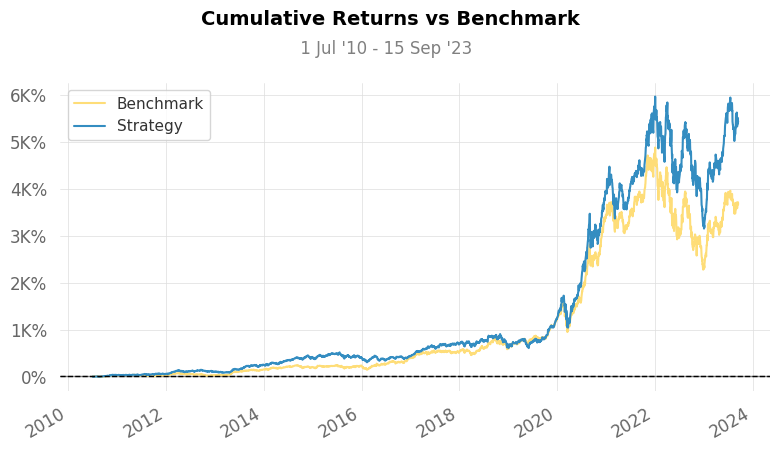

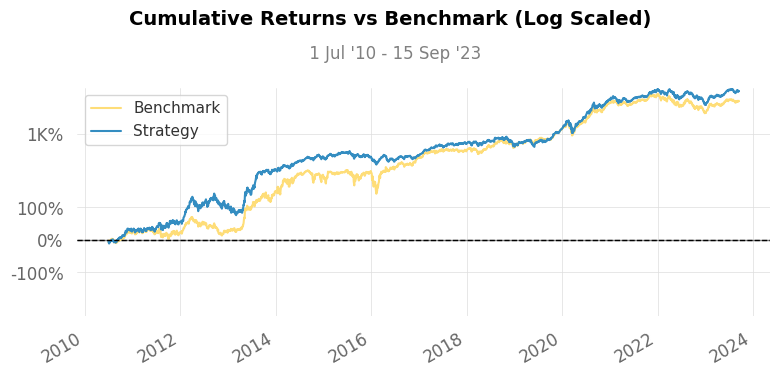

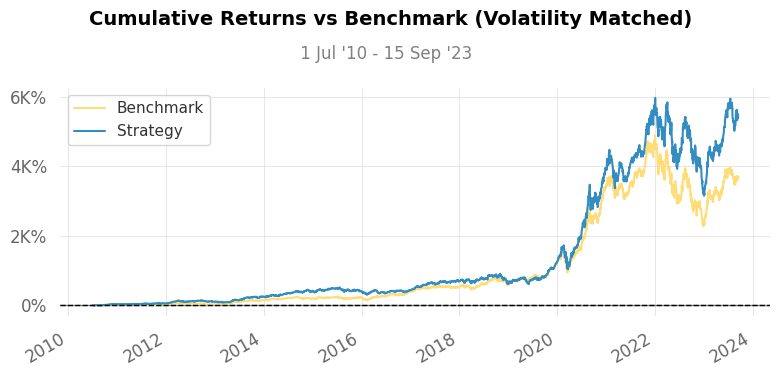

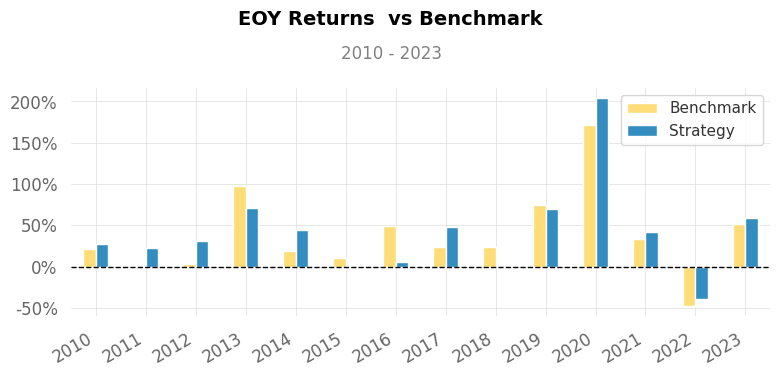

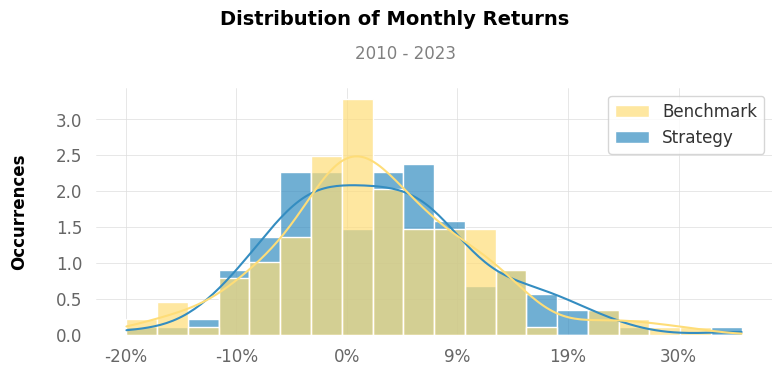

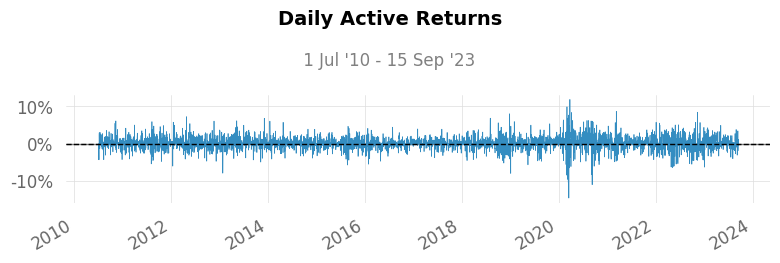

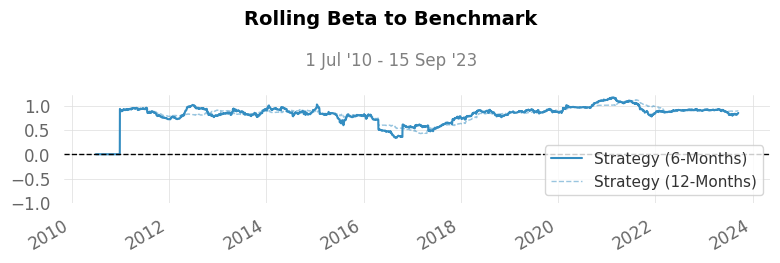

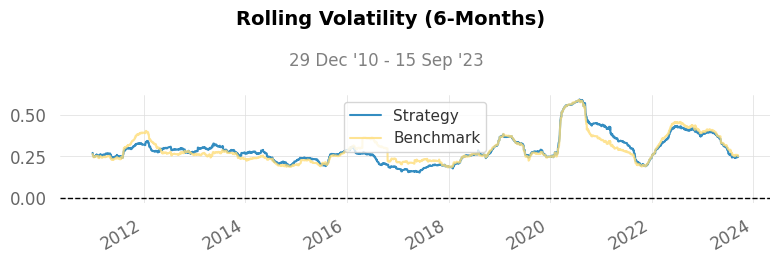

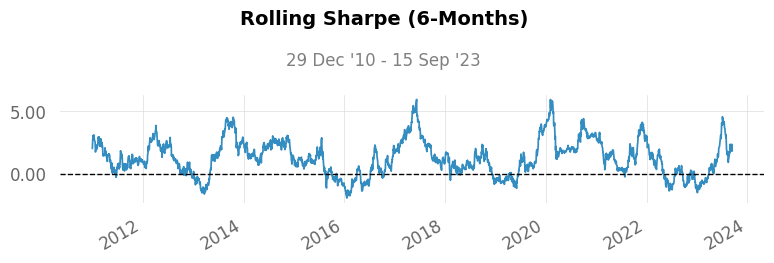

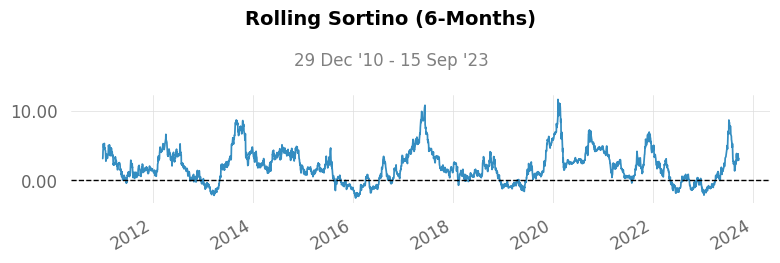

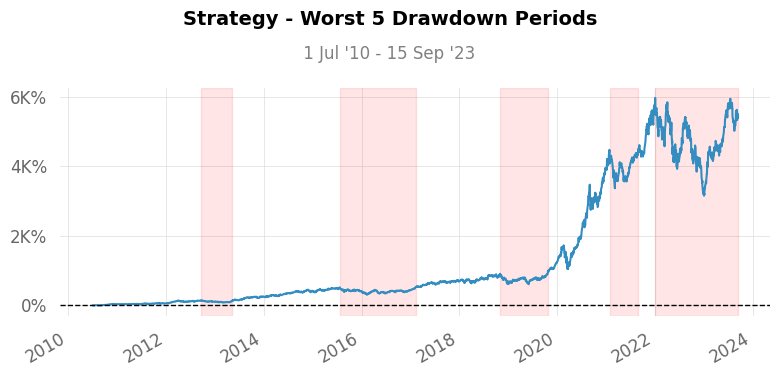

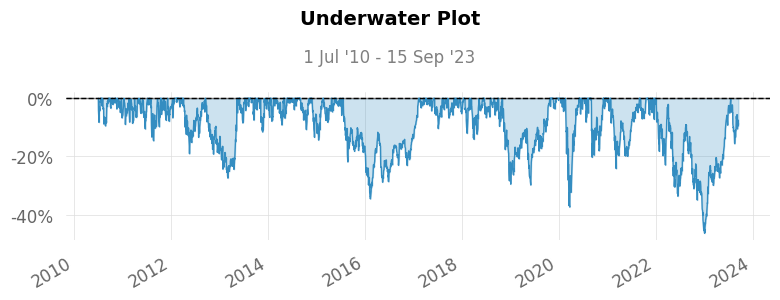

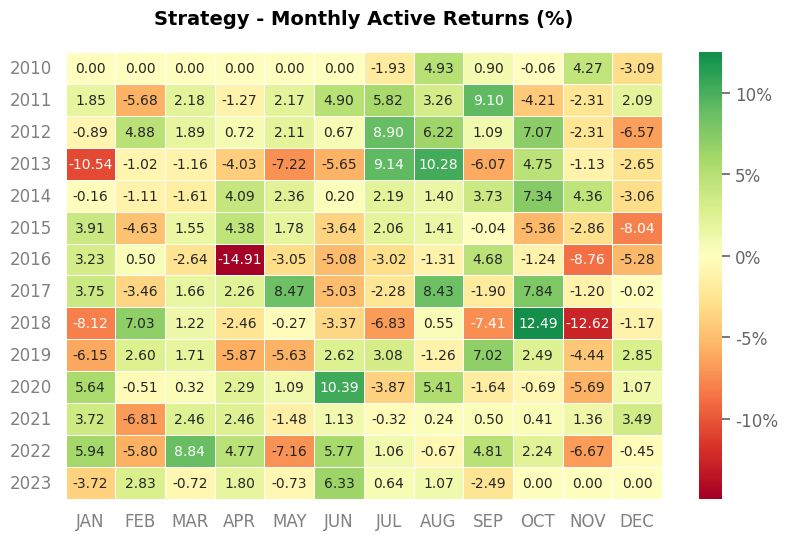

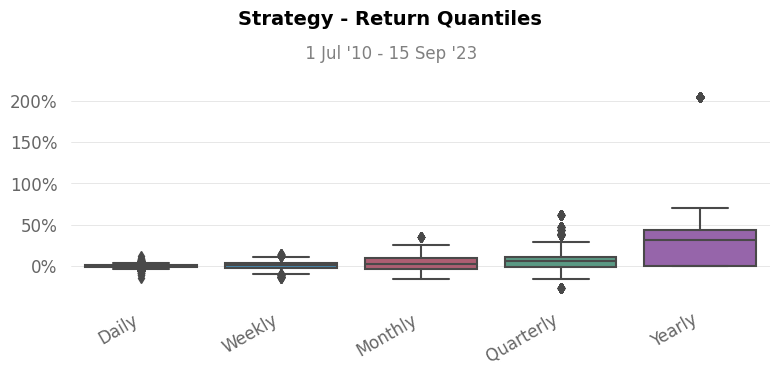

In [ ]:
qs.reports.full(optimized_portfolio_us, benchmark = portfolio_usa)

[Performance Metrics]



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-07-02   2010-07-02
End Period                 2023-09-15   2023-09-15
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          109.4%       149.27%
CAGR﹪                     3.94%        4.89%

Sharpe                     0.42         0.5
Prob. Sharpe Ratio         93.63%       96.46%
Smart Sharpe               0.39         0.47
Sortino                    0.59         0.71
Smart Sortino              0.56         0.67
Sortino/√2                 0.42         0.5
Smart Sortino/√2           0.39         0.47
Omega                      1.1          1.1

Max Drawdown               -39.24%      -34.77%
Longest DD Days            883          685
Volatility (ann.)          16.71%       16.9%
R^2                        0.92         0.92
Information Ratio          0.02         0.02
Calmar                 

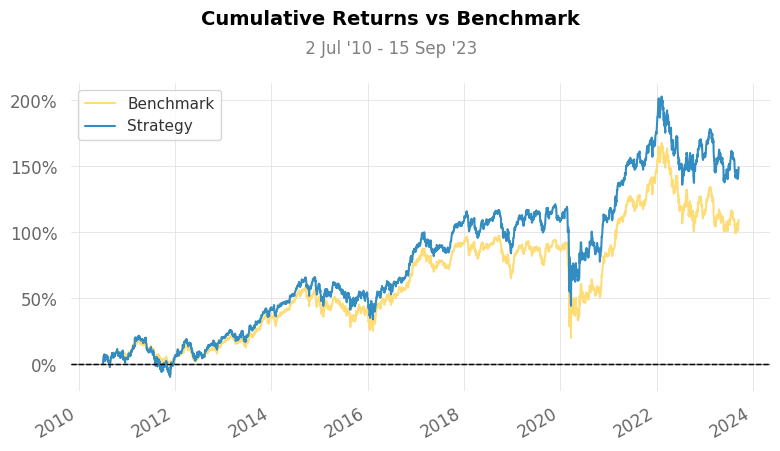

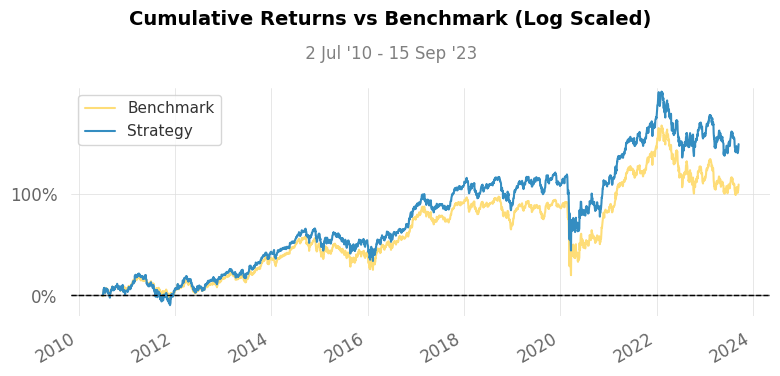

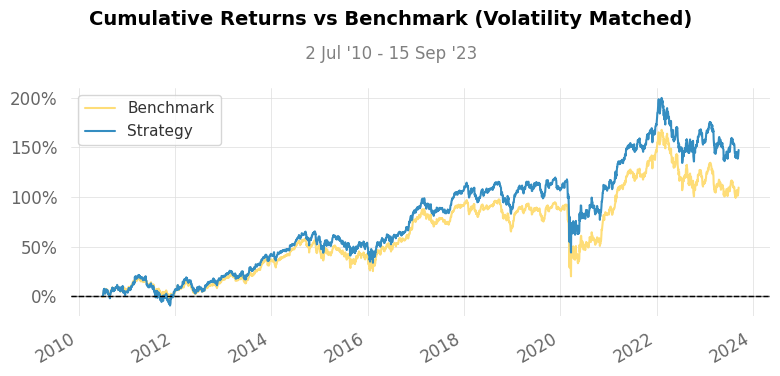

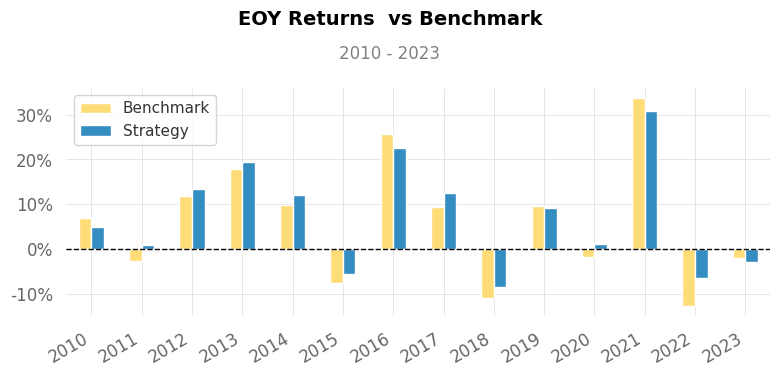

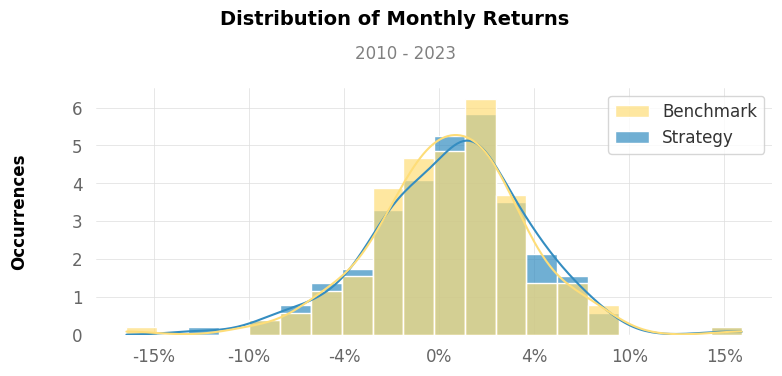

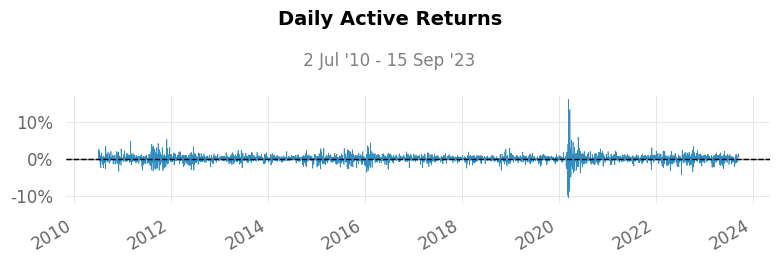

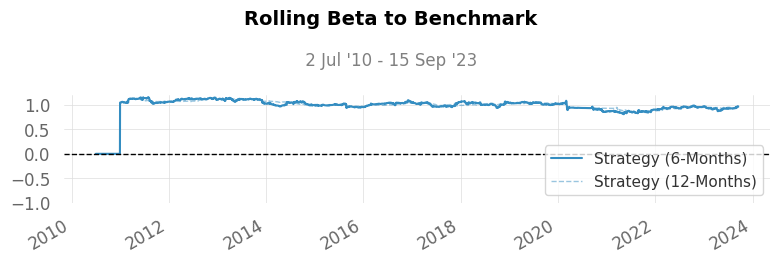

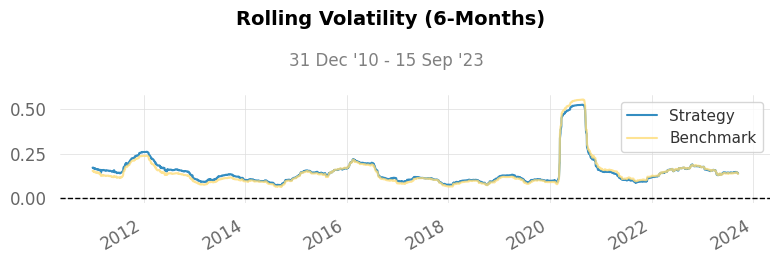

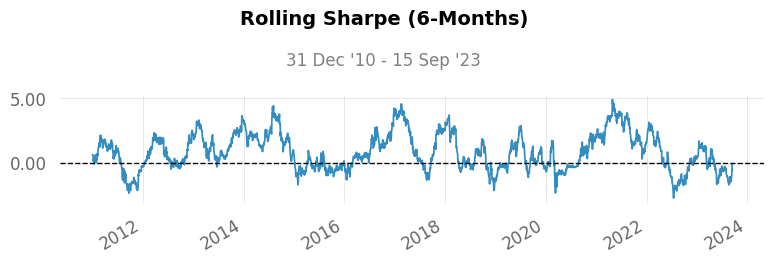

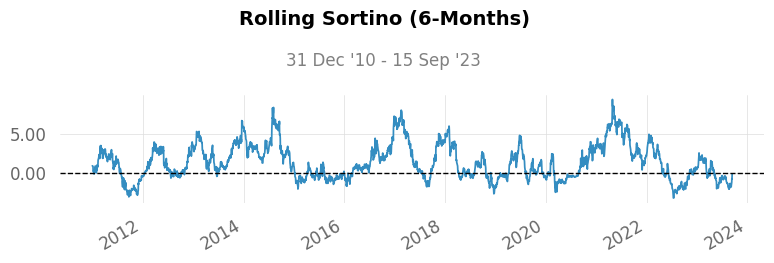

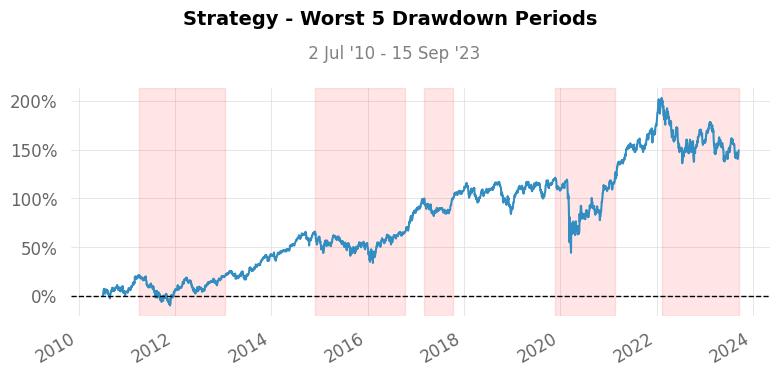

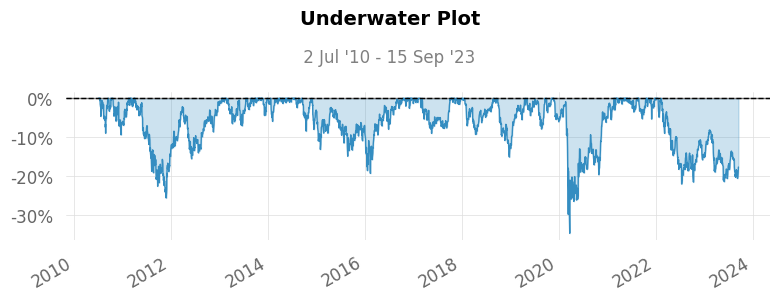

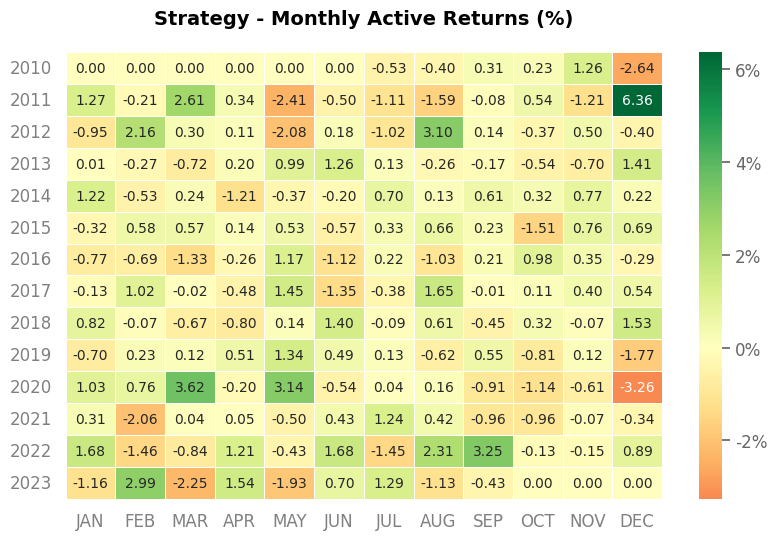

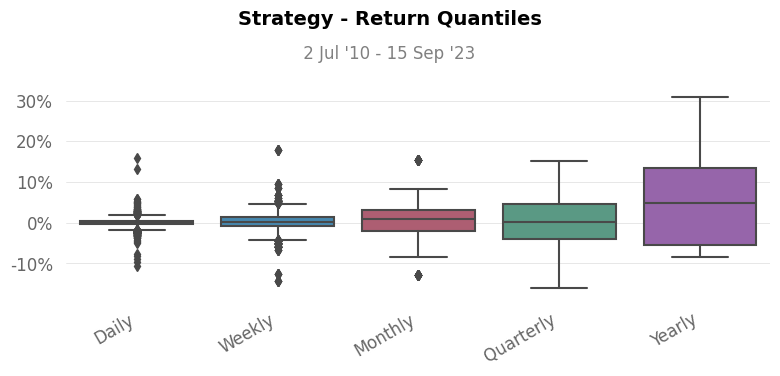

In [ ]:
qs.reports.full(optimized_portfolio_can, benchmark = portfolio_can)